In [15]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pyAudioAnalysis.MidTermFeatures import directory_feature_extraction as dW

In [4]:
# Paths for training and test data
train_csv_path =  'Dataset 8k\\train.csv'
train_audio_dir = 'Dataset 8k\\Train'
test_csv_path = 'Dataset 8k\\test.csv'
test_audio_dir = 'Dataset 8k\\Test'
#output_csv = 'AUDIO FILES\\test\\test_predictions.csv'
classes = ["children_playing", "drilling", "street_music", "siren", "gun_shot", 
               "car_horn", "air_conditioner", "engine_idling", "children_playing", "dog_bark"]

In [10]:
def explore_data(csv_path, audio_dir, num_samples=5):
        """
        Performs exploratory analysis on the audio data.

        Args:
            csv_path (str): Path to the CSV file.
            audio_dir (str): Directory containing audio files.
            num_samples (int): Number of samples to visualize per class.
        """
        # Load the data
        train_data = pd.read_csv(csv_path)

        # Display basic information about the dataset
        print("Dataset information:")
        print(train_data.info())
        
        # Display class distribution
        print("\nClass distribution:")
        class_distribution = train_data['Class'].value_counts()
        print(class_distribution)
        
        # Generate colors from the 'jet' colormap
        color_palette = plt.cm.jet(np.linspace(0, 1, len(class_distribution)))

        # Plot class distribution
        plt.figure(figsize=(10, 10))
        ax1 = plt.subplot(2, 1, 1)
        class_distribution.plot(kind='bar', color=color_palette, ax=ax1)
        plt.title('Class Distribution')
        plt.xlabel('Classes')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        for i, count in enumerate(class_distribution):
            ax1.text(i, count + 10, str(count), ha='center')
        manager = plt.get_current_fig_manager()
        # manager.window.geometry("+{}+{}".format(0, 0))  # Spawn to top left corner
        plt.pause(0.1)  # Pause to allow the window to be positioned correctly
        plt.show()
        
        # Duration distribution of audio files
        durations = []
        for idx, row in train_data.iterrows():
            file_path = os.path.join(audio_dir, str(row['ID']) + '.wav')
            y, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=y, sr=sr)
            durations.append(duration)

        plt.figure(figsize=(10, 7))
        sns.histplot(durations, bins=30)
        plt.title('Duration Distribution of Audio Files')
        plt.xlabel('Duration (s)')
        plt.ylabel('Count')
        plt.tight_layout()
        manager = plt.get_current_fig_manager()
        # manager.window.geometry("+{}+{}".format(0, 0))  # Spawn to top left corner
        plt.pause(0.1)
        plt.show()

        # Visualize MFCC features for a few samples from each class
        classes = train_data['Class'].unique()
        plt.figure(figsize=(16, 8))
        for i, cls in enumerate(classes):
            plt.subplot(3, 4, i + 1)
            plt.title(cls)
            class_samples = train_data[train_data['Class'] == cls].sample(num_samples)
            for _, row in class_samples.iterrows():
                file_path = os.path.join(audio_dir, str(row['ID']) + '.wav')
                y, sr = librosa.load(file_path, sr=None)
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                librosa.display.specshow(mfcc, sr=sr, x_axis='time')
                plt.ylabel('MFCC Coefficients')
                plt.xlabel('Time')
        plt.tight_layout()
        manager = plt.get_current_fig_manager()
        # manager.window.geometry("+{}+{}".format(0, 0))  # Spawn to top left corner
        plt.pause(0.1)
        plt.show()

In [13]:
def seperate_folders(csv_file,folder_path):
    
    # Read CSV file into pandas DataFrame
    df = pd.read_csv(csv_file)

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        file_id = str(row['ID']) + ".wav"  # Construct the WAV file name from ID
        category = row['Class']  # Get the category
        
        # Check if the WAV file exists
        if os.path.exists(os.path.join(folder_path, file_id)):
            # Create folder if it doesn't exist
            category_folder = os.path.join(folder_path, category)
            if not os.path.exists(category_folder):
                os.makedirs(category_folder)
            
            # Move the WAV file to the corresponding category folder
            shutil.move(os.path.join(folder_path, file_id), os.path.join(category_folder, file_id))
            print(f"Moved {file_id} to {category} folder.")
        else:
            print(f"File {file_id} not found.")

    print("Task completed.")
        

In [7]:
def extract_features(classes):
    
    features = []
    for i in range(len(classes)):
        folder_name = classes[i]
        folder_path = f"C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project\\Dataset 8k\\Train\\{folder_name}"
        f, _, fn, = dW(folder_path, 1, 1, 0.1, 0.1)
        features.append((f, fn))  # Store features and corresponding feature names
    return features
    

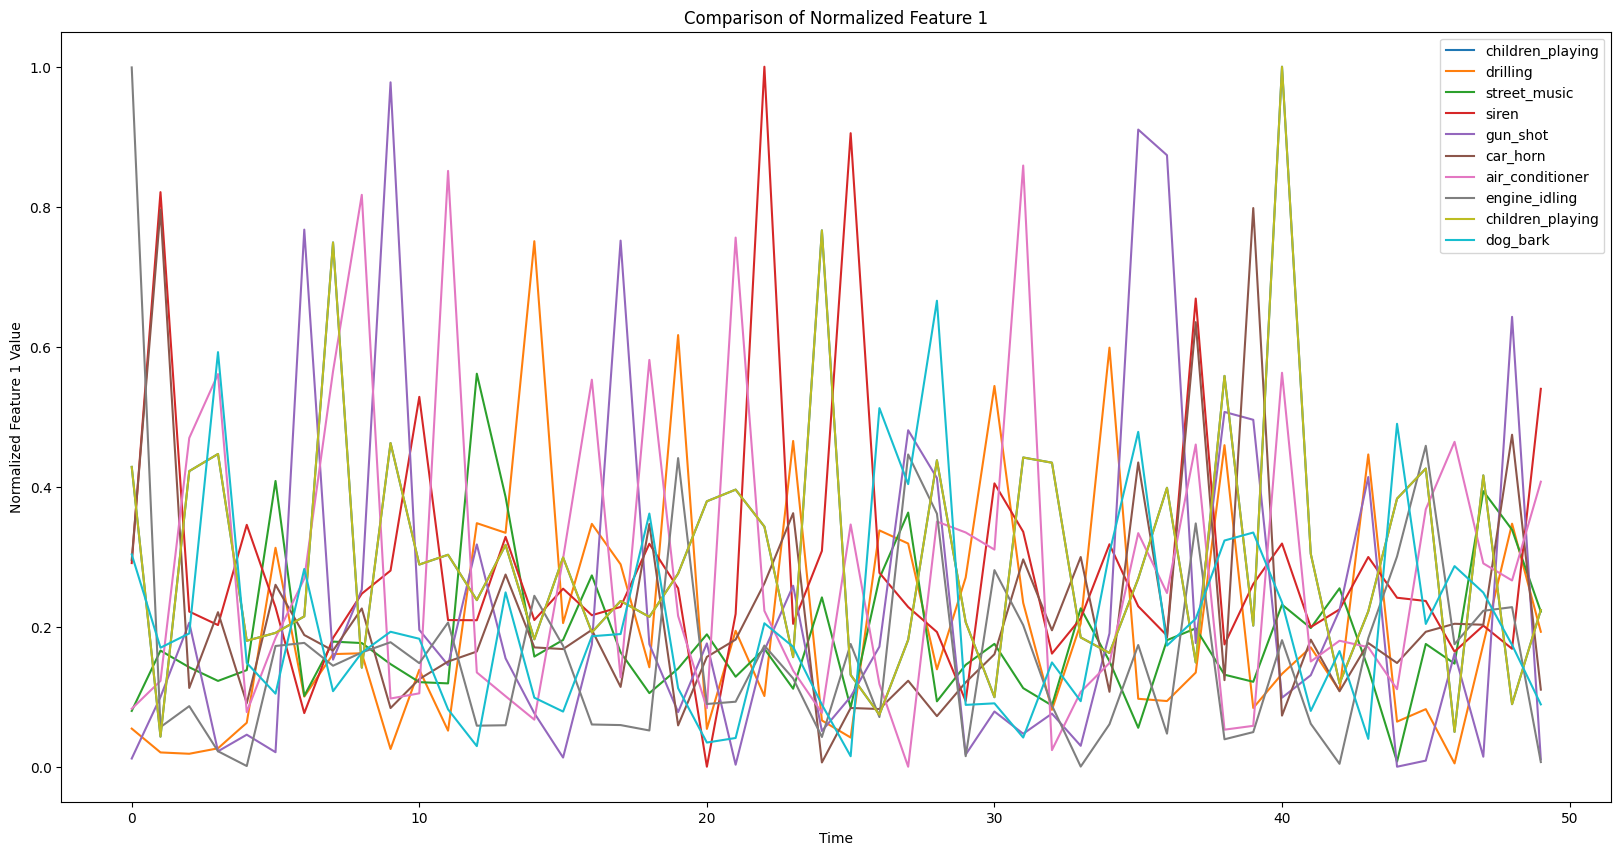

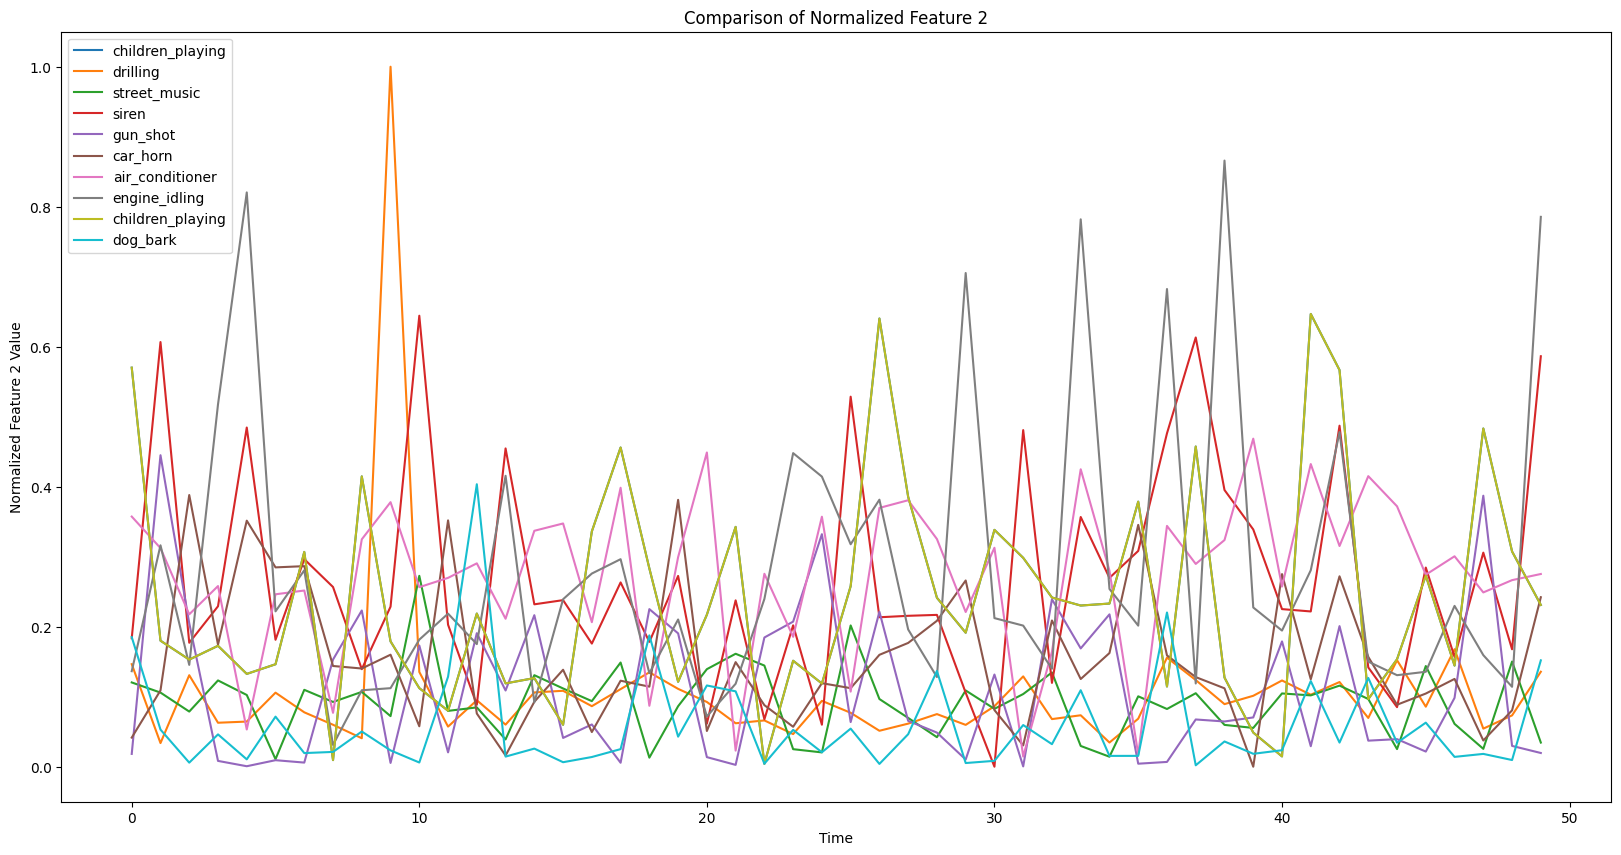

In [54]:


def plot_nor_feat(features, classes, num_feat=2):
    # Normalize the features
    scaler = MinMaxScaler()
    normalized_features = []

    for i in range(10):
        scaler.fit(features[i][0])  # Fit the scaler on the current feature
        f_normalized = scaler.transform(features[i][0])
        normalized_features.append(f_normalized)

    # Plot the first num_feat features in separate plots
    for i in range(num_feat):
        plt.figure(figsize=(20, 10))
        for j in range(10):  # Assuming you have 4 classes
            plt.plot(normalized_features[j][50:100, i], label=classes[j])
        plt.xlabel('Time')
        plt.ylabel(f'Normalized Feature {i+1} Value')
        plt.title(f'Comparison of Normalized Feature {i+1}')
        plt.legend()
        plt.show()




Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5435 non-null   int64 
 1   Class   5435 non-null   object
dtypes: int64(1), object(1)
memory usage: 85.1+ KB
None

Class distribution:
Class
jackhammer          668
engine_idling       624
siren               607
street_music        600
drilling            600
dog_bark            600
children_playing    600
air_conditioner     600
car_horn            306
gun_shot            230
Name: count, dtype: int64


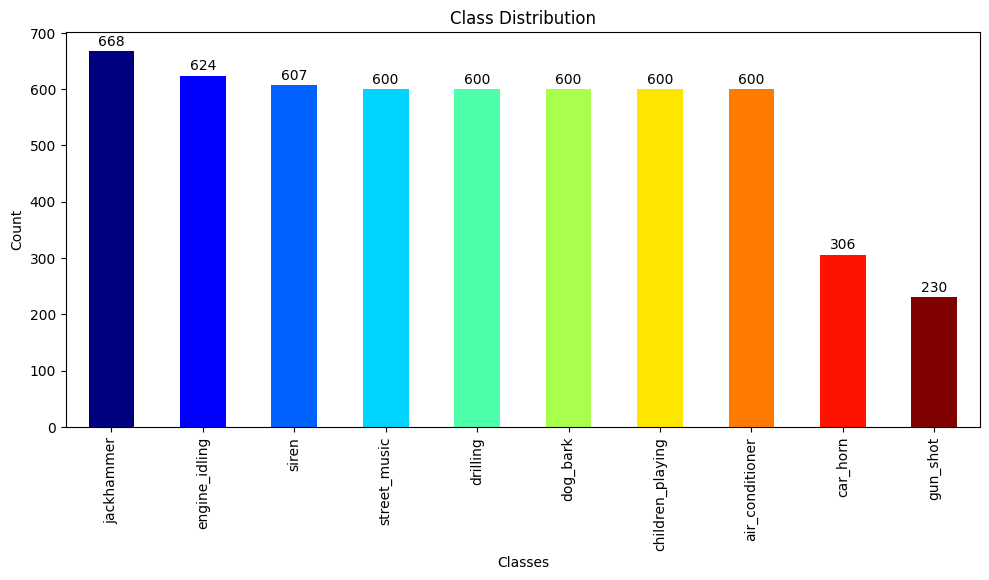

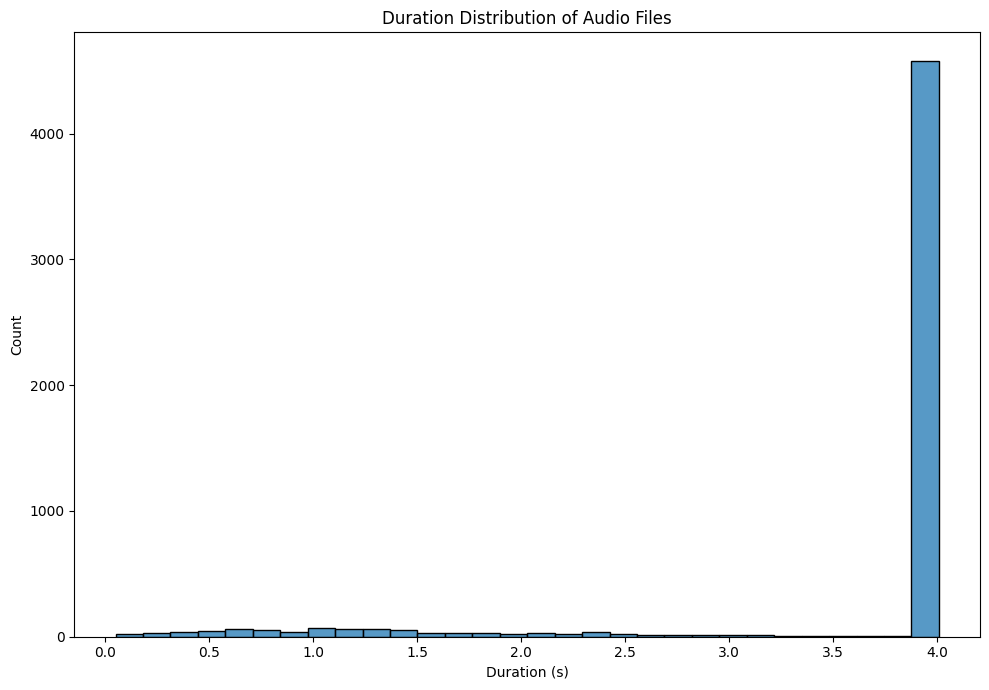

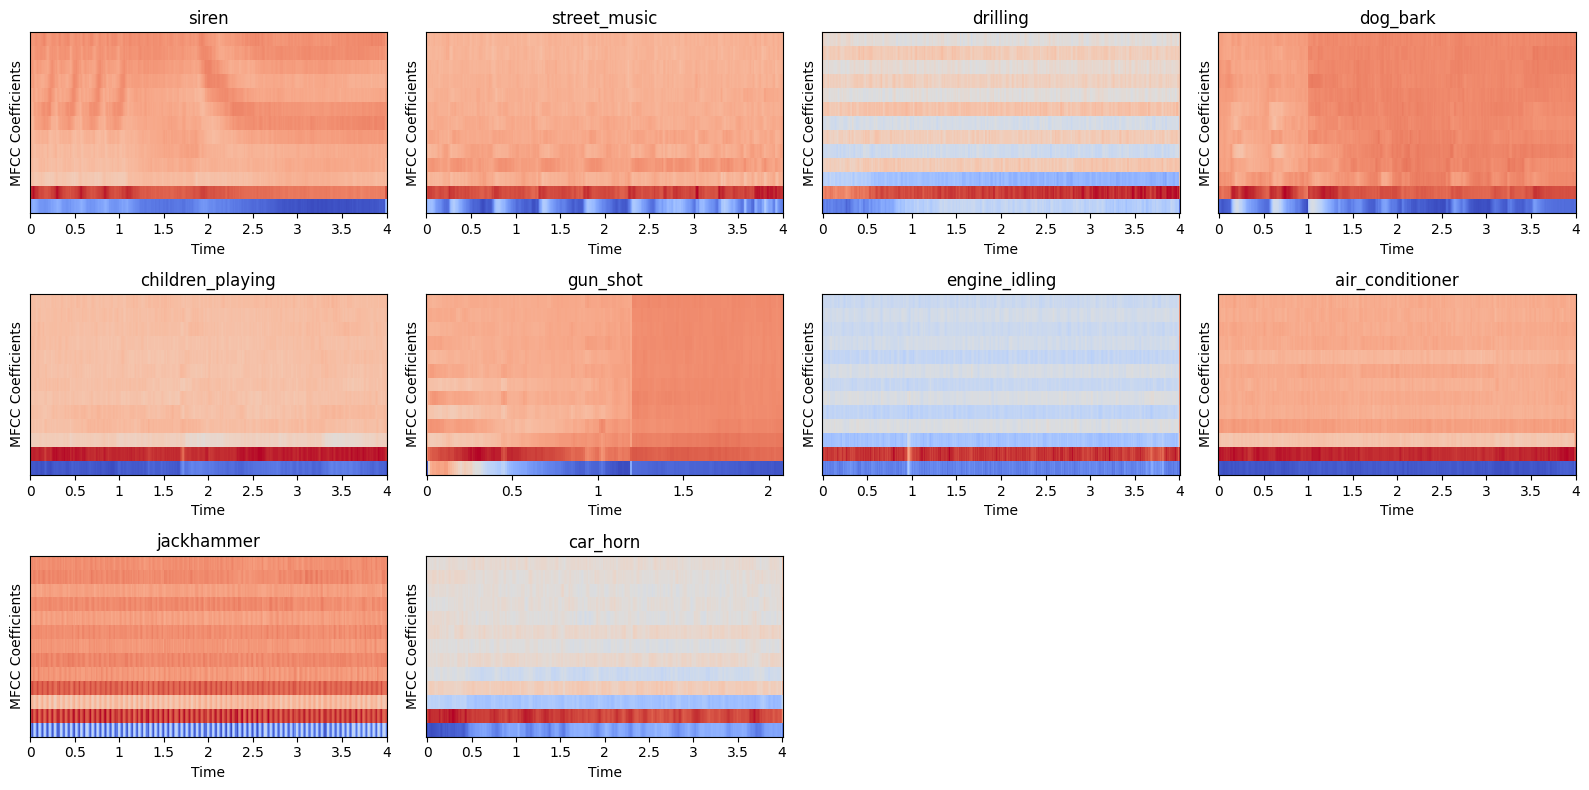

In [12]:
explore_data(train_csv_path, train_audio_dir)

In [21]:
seperate_folders(train_csv_path,train_audio_dir)

Moved 0.wav to siren folder.
Moved 1.wav to street_music folder.
Moved 2.wav to drilling folder.
Moved 3.wav to siren folder.
Moved 4.wav to dog_bark folder.
Moved 6.wav to children_playing folder.
Moved 10.wav to street_music folder.
Moved 11.wav to drilling folder.
Moved 12.wav to gun_shot folder.
Moved 15.wav to dog_bark folder.
Moved 17.wav to engine_idling folder.
Moved 18.wav to siren folder.
Moved 19.wav to gun_shot folder.
Moved 20.wav to engine_idling folder.
Moved 22.wav to air_conditioner folder.
Moved 24.wav to air_conditioner folder.
Moved 26.wav to engine_idling folder.
Moved 27.wav to siren folder.
Moved 32.wav to children_playing folder.
Moved 33.wav to jackhammer folder.
Moved 35.wav to gun_shot folder.
Moved 36.wav to siren folder.
Moved 37.wav to jackhammer folder.
Moved 38.wav to street_music folder.
Moved 40.wav to jackhammer folder.
Moved 42.wav to engine_idling folder.
Moved 43.wav to siren folder.
Moved 44.wav to children_playing folder.
Moved 45.wav to jackhamm

In [48]:
#We need to delete one file to go on now its the 3190.wav
extracted_features = extract_features(classes)

Analyzing file 1 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1014.wav
Analyzing file 2 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1022.wav
Analyzing file 3 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1024.wav
Analyzing file 4 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1027.wav
Analyzing file 5 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1040.wav
Analyzing file 6 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1051.wav
Analyzing file 7 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1054.wav
Analyzing file 8 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1056.wav
Analyzing file 9 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 

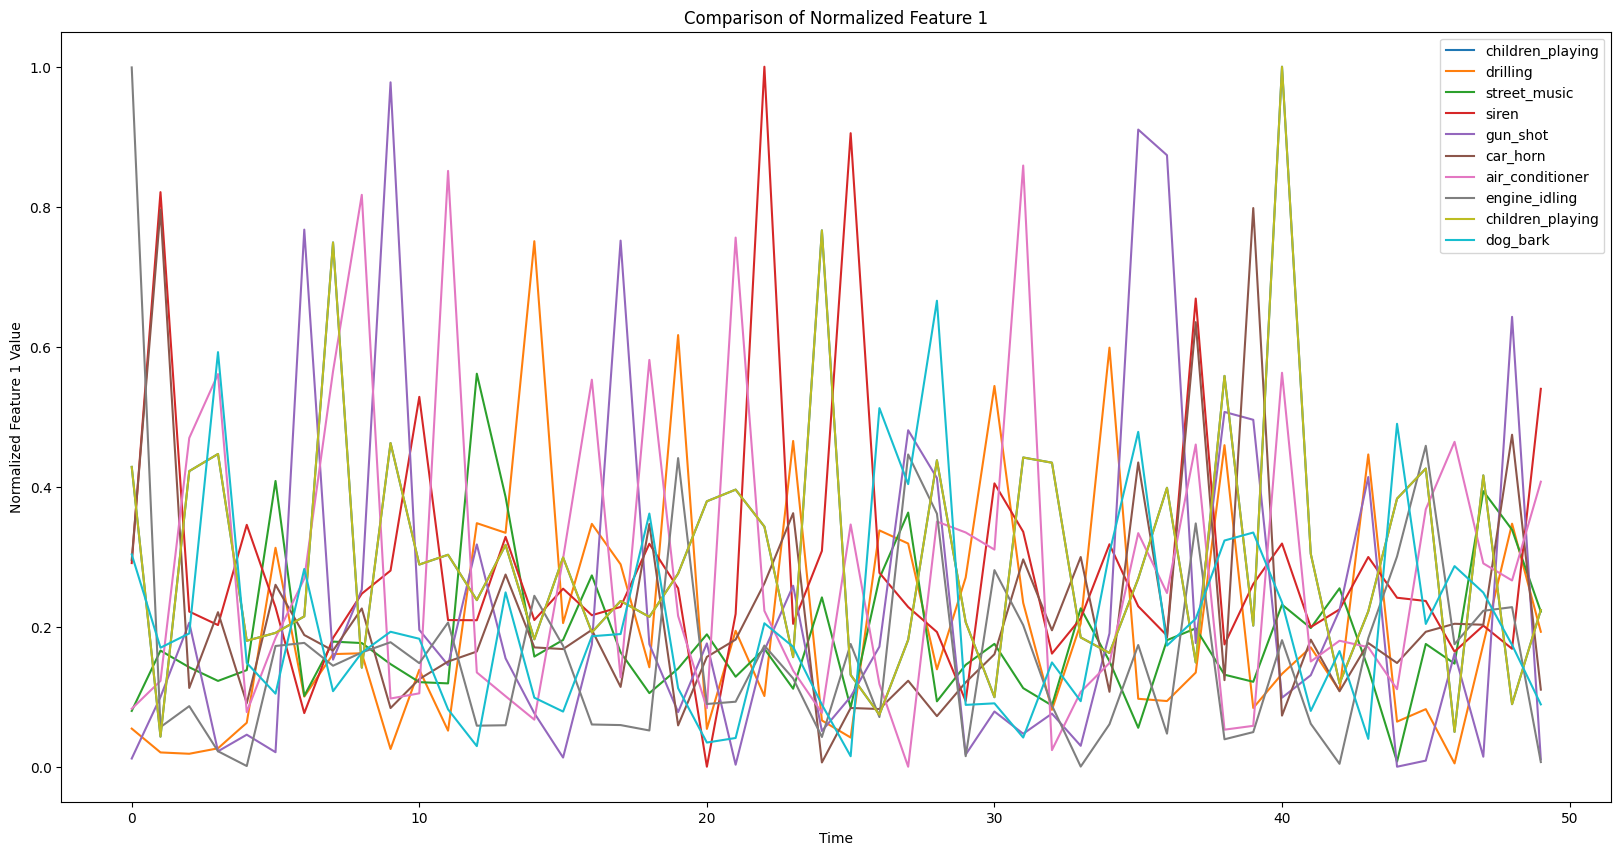

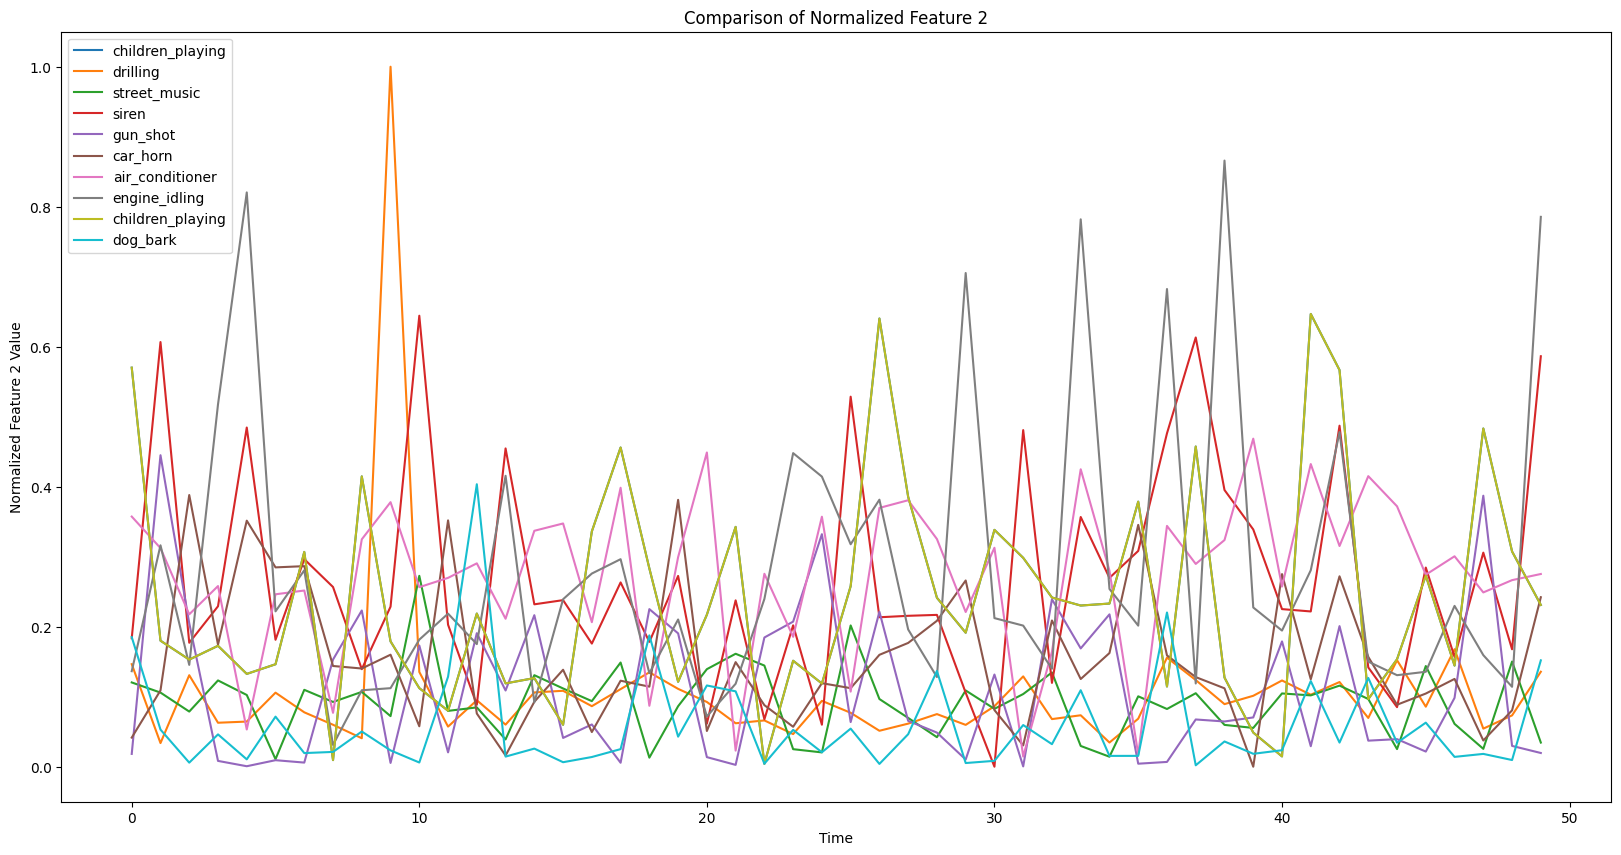

In [55]:
# Example usage
plot_nor_feat(extracted_features, classes, num_feat=2)